In [1]:
import pandas as pd
import statsmodels.api as sm
import math
import script1
from sklearn.cluster import KMeans
import numpy as np
import seaborn
import pprint


data = pd.read_csv('merged_data.v2.csv')

data['release_date_wide'] = pd.to_datetime(data['release_date_wide'])
data['release_year_qtr'] = data['release_date_wide'].apply(lambda x: x.year*100+x.quarter)
data['release_qtr'] = data['release_date_wide'].apply(lambda x: x.quarter)

data['sqrt_prodcost']=[math.sqrt(x) for x in data.production_budget]

data.sqrt_prodcost.hist()

dat = data.dropna()

dir_data=dat.groupby('director_x')
dir_production=dir_data['production_budget'].mean()

dir_production.describe()

dir_1=dir_production[dir_production<=1.7E7].index
dir_2=dir_production[(dir_production>1.7E7) & (dir_production<=3.65E7)].index
dir_3=dir_production[(dir_production>3.65E7) & (dir_production<=6.5E7)].index
dir_4=dir_production[dir_production>6.5E7].index

dat['dir_cat'] = np.nan
dat['dir_cat'][dat.director_x.isin(dir_1)] = "DIR 1"
dat['dir_cat'][dat.director_x.isin(dir_2)] = "DIR 2"
dat['dir_cat'][dat.director_x.isin(dir_3)] = "DIR 3"
dat['dir_cat'][dat.director_x.isin(dir_4)] = "DIR 4"

studio_data=dat.groupby('studio')
studio_production=studio_data['production_budget'].mean()

studio_production.describe()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3947: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda/lib/python2.7/site-packages/IPython/core/interactiv

count    8.500000e+01
mean     3.678659e+07
std      2.846045e+07
min      5.000000e+05
25%      1.300000e+07
50%      2.800000e+07
75%      5.510417e+07
max      1.350000e+08
Name: production_budget, dtype: float64

In [2]:
studio_1=studio_production[studio_production<=1.3E7].index
studio_2=studio_production[(studio_production>1.3E7) & (studio_production<=2.8E7)].index
studio_3=studio_production[(studio_production>2.8E7) & (studio_production<=5.51E7)].index
studio_4=studio_production[studio_production>5.51E7].index

dat['studio_cat'] = np.nan
dat['studio_cat'][dat.studio.isin(studio_1)] = "Studio 1"
dat['studio_cat'][dat.studio.isin(studio_2)] = "Studio 2"
dat['studio_cat'][dat.studio.isin(studio_3)] = "Studio 3"
dat['studio_cat'][dat.studio.isin(studio_4)] = "Studio 4"

st_cat=pd.get_dummies(dat['studio_cat'])
d_cat=pd.get_dummies(dat['dir_cat'])

X_data=st_cat.ix[:,0:3].join(d_cat.ix[:,0:3])

#pd.get_dummies(dat['genre'])

Y = dat.sqrt_prodcost
X=sm.add_constant(X_data)

fit1 = sm.OLS(Y,X)
fit1 = fit1.fit()
fit1.summary()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A va

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqrt_prodcost   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     294.6
Date:                Fri, 16 Oct 2015   Prob (F-statistic):          8.54e-213
Time:                        14:28:58   Log-Likelihood:                -8479.6
No. Observations:                 956   AIC:                         1.697e+04
Df Residuals:                     949   BIC:                         1.701e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9546.9822    103.195     92.514      0.000      9344.466  9749.498
Studio 1   -1647.5305    229.742     -7.171      0.000     -2098.391 -1196.670
Studio 2   -1512.8295    199.052     -7.600      0.000     -1903.463 -1122.196
Studio 3    -665.4834    152.012     -4.378      0.000      -963.803  -367.164
DIR 1      -5530.1353    204.696    -27.016      0.000     -5931.845 -5128.426
DIR 2      -3965.8575    163.904    -24.196      0.000     -4287.514 -3644.201
DIR 3      -2376.6212    143.885    -16.517      0.000     -2658.992 -2094.251
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.618
Skew:                          -0.200   Prob(JB):                     1.36e-07
Kurtosis:                       3.796   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
%matplotlib inline

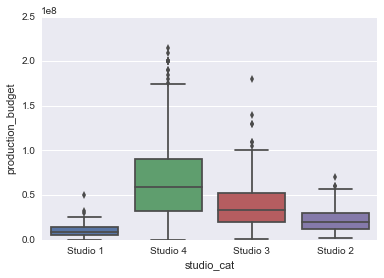

In [4]:
seaborn.boxplot(x='studio_cat',y='production_budget',data=dat)

In [13]:
print(studio_1)

Index([u'A24', u'Affirm Films', u'Anchor Bay Films', u'CW Television Network',
       u'Fox Atomic', u'Fox Searchlight Pictures', u'Gramercy Pictures (I)',
       u'Hannover House', u'IFC Films', u'Lions Gate Films',
       u'Magnet Releasing', u'Magnolia Pictures', u'Open Road Films (II)',
       u'Oscilloscope Pictures', u'Provident Films', u'Roadside Attractions',
       u'Sony Pictures Classics', u'Telepathic Studios', u'USA Films',
       u'Universal Focus', u'Universal Home Entertainment',
       u'Warner Bros. Domestic Television Distribution'],
      dtype='object', name=u'studio')


In [14]:
print(studio_2)

Index([u'Apparition', u'Buena Vista Television', u'CBS Films',
       u'Focus Features', u'Freestyle Releasing', u'Herrick Entertainment',
       u'MGM Distribution', u'MGM/UA Distribution Company', u'Newmarket Films',
       u'Open Road Films', u'Orion Pictures Corporation', u'Paramount Vantage',
       u'Picturehouse', u'Relativity Media', u'Rogue Pictures',
       u'Romar Entertainment', u'Samuel Goldwyn Films', u'Screen Gems',
       u'Summit Distribution', u'Warner Independent Pictures (WIP)',
       u'Yari Film Group Releasing'],
      dtype='object', name=u'studio')


In [15]:
print(studio_3)

Index([u'Dimension Films', u'DreamWorks SKG', u'FilmDistrict',
       u'Fox 2000 Pictures', u'Fox-Walden', u'Lionsgate',
       u'Metro-Goldwyn-Mayer (MGM)', u'Miramax Films', u'My Network TV',
       u'New Line Cinema', u'Overture Films', u'Paramount Home Entertainment',
       u'Sony Pictures Home Entertainment', u'Summit Entertainment',
       u'TWC-Dimension', u'Touchstone Pictures', u'TriStar Pictures',
       u'United Artists', u'Warner Bros.', u'Weinstein Company, The'],
      dtype='object', name=u'studio')


In [16]:
print(studio_4)

Index([u'Buena Vista Pictures', u'Buena Vista Pictures Distribution',
       u'Columbia Broadcasting System (CBS)', u'Columbia Pictures',
       u'DreamWorks Distribution', u'Fox Family Films', u'Gkids',
       u'Metro Goldwyn Distributing Company',
       u'Metro-Goldwyn-Mayer Distributing Corporation (MGM)',
       u'National Broadcasting Company (NBC)', u'Paramount Pictures',
       u'Revolution Studios', u'Sony Pictures Entertainment (SPE)',
       u'Sony Pictures Releasing', u'Touchstone Home Video',
       u'Twentieth Century Fox', u'Twentieth Century Fox Film Corporation',
       u'Universal Pictures', u'Village Roadshow Entertainment',
       u'Walt Disney Pictures', u'Walt Disney Studios Motion Pictures',
       u'Warner Bros. Pictures'],
      dtype='object', name=u'studio')


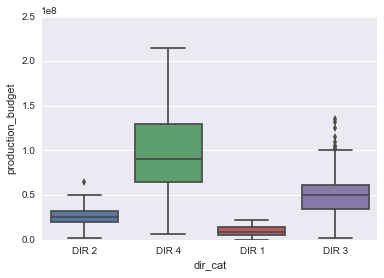

In [5]:
seaborn.boxplot(x='dir_cat',y='production_budget',data=dat)

In [18]:
print(dir_1.tolist())

['Alejandro Monteverde', 'Alex Kendrick', 'Alex Kurtzman', 'Allen Coulter', 'Andres Muschietti', 'Andrew ErwinJon Erwin', 'Anna BodenRyan Fleck', 'Ari Sandel', 'Atom Egoyan', 'Charles Ferguson', 'Chris Kentis', 'Chris Rock', 'Chris Stokes', 'Christopher Guest', 'Colin StrauseGreg Strause', 'Courtney Solomon', 'Craig Brewer', 'Damien Chazelle', 'Dan Rush', 'Daniel Barnz', 'Daniel Stamm', 'David Ayer', 'David Michod', 'David PalmerDax Shepard', 'Davis Guggenheim', 'Debra Granik', 'Denzel Washington', 'Derek Cianfrance', 'Drew Barrymore', 'Eli Roth', 'Elizabeth Allen (II)', 'Elizabeth Banks*Steven Brill*Steve Carr*James Duffy*Griffin Dunne*Peter Farrelly*Patrik Forsberg*James Gunn*Bob Odenkirk*Brett Ratner*', 'Ethan ManiquisRobert Rodriguez', 'Fede Alvarez', 'Greg Coolidge', 'Harmony Korine', 'Henry JoostAriel Schulman', 'J.C. Chandor', 'James DeMonaco', 'James Gunn', 'James Marsh', 'James Wan', 'Jane Campion', 'Jason Moore', 'Jason Reitman', 'Jay DuplassMark Duplass', 'Jeff Nichols', 'Je

In [19]:
print(dir_2.tolist())

['2/9/10 2010 Preview: Paranormal Activity 2', 'Aaron Seltzer', 'Alejandro Gonz\xed\x80\x8c\xe7lez I\xed\x80\x8c\xb1\xed\x80\x8c\xe7rritu', 'Alexander Payne', 'Alister Grierson', 'Allen Hughes', 'Andy Fickman', 'Anne Fletcher', 'Ava DuVernay', 'Barry Levinson', 'Ben Affleck', 'Ben Falcone', 'Bennett Miller', 'Bill Condon', 'Bille Woodruff', 'Boaz Yakin', 'Brad Furman', 'Bruce A. Evans', 'Burr Steers', 'Camille Delamarre', 'Catherine Hardwicke', 'Charles Martin Smith', 'Charles Stone III', 'Charlie Kaufman', 'Chris Columbus', 'Chris Gorak', 'Christian Alvart', 'Craig Gillespie', 'Danny Boyle', 'David Frankel', 'David Gordon Green', 'David LeitchChad Stahelski', 'David R. Ellis', 'David Slade', 'David Wain', 'Don Hall', 'Douglas McGrath', 'Duncan Jones', 'Ed Harris', 'Edgar Wright', 'Eric Valette', 'Fernando Meirelles', 'Fred Wolf', 'Gary Fleder', 'Gary Winick', 'Greg Mottola', 'Gus Van Sant', 'Howard Deutch', 'Ivan Reitman', 'Jake Kasdan', 'James Mangold', 'James MatherStephen St. Leger

In [20]:
print(dir_3.tolist())

['Adam McKay', 'Adam Shankman', 'Akiva Goldsman', 'Andrew Adamson', 'Andrew Davis', 'Andrew Niccol', 'Andrzej Bartkowiak', 'Andy Tennant', 'Angelina Jolie', 'Anthony Hemingway', 'Anthony RussoJoe Russo', 'Asger Leth', 'Baltasar Kormakur', 'Betty Thomas', 'Brian Robbins', 'Bruce Robinson', 'Cameron Crowe', 'Carl Franklin', 'Charles Shyer', 'Chris ButlerSam Fell', 'Christophe Gans', 'Clint Eastwood', 'Curtis Hanson', 'D.J. Caruso', 'Danny DeVito', 'Darren Aronofsky', 'David Bowers', 'David Dobkin', 'David Koepp', 'David O. Russell', 'David Twohy', 'David Zucker', 'Denis Villeneuve', 'Dennis Dugan', 'Dominic Sena', 'Ethan CoenJoel Coen', 'F. Gary Gray', 'Florian Henckel von Donnersmarck', 'Frank Darabont', 'Frank MillerRobert Rodriguez', 'Gabriele Muccino', 'Garry Marshall', 'George Clooney', 'George Nolfi', 'Gil Kenan', 'Greg Berlanti', 'Gregory Hoblit', 'Guy Ritchie', 'Harald Zwart', 'Harold Ramis', 'Henry Selick', 'J.J. Abrams', 'James Bobin', 'James L. Brooks', 'James McTeigue', 'Jan 

In [21]:
print(dir_4.tolist())

['Albert HughesAllen Hughes', 'Alex Proyas', 'Alfonso Cuaron', 'Andrew AdamsonKelly AsburyConrad Vernon', 'Andrew Stanton', 'Andrew StantonLee Unkrich', 'Andy & Lana Wachowski', 'Ang Lee', 'Anthony Minghella', 'Antoine Fuqua', 'Barry CookNeil Nightingale', 'Barry Sonnenfeld', 'Baz Luhrmann', 'Ben Stiller', 'Brad Bird', 'Brad Silberling', 'Breck Eisner', 'Brenda ChapmanSimon Wells', 'Brett Ratner', 'Brian De Palma', 'Bryan Singer', 'Carl Rinsch', 'Carlos Saldanha', 'Carlos Saldanha (co-director)Chris Wedge', 'Chris Buck', 'Chris Weitz', 'Chris Williams', 'Christopher Nolan', 'Clark Johnson', 'Daniel Espinosa', 'David BowersSam Fell', 'David Fincher', 'David Soren', 'Dean DeBlois', 'Dean DeBloisChris Sanders', 'Dean Parisot', 'Don Bluth', 'Doug Liman', 'Edward Zwick', 'Eric DarnellSimon J. Smith', 'Eric DarnellTim Johnson', 'Francis Lawrence', 'Frank Coraci', 'Frank Oz', 'Gary McKendry', 'Gary Ross', 'Gary Shore', 'Gavin Hood', 'Genndy Tartakovsky', 'George Miller', 'Gore Verbinski', 'Gu